In [1]:
import os
import pandas as pd
import numpy as np 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from catboost import CatBoostRegressor, Pool , CatBoostClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
import itertools

In [2]:
df1 = pd.read_csv('sa_play.csv') 
df1 = df1.drop(columns = ['Unnamed: 0', 'Date'])
df2 = pd.read_csv('sa_all(play).csv') 
df2 = df2.drop(columns = ['Unnamed: 0', 'Date'])
df = pd.concat([df1, df2], axis=0, join='outer')
df.head()

,Surgery,ASA,Emergency,Age,Height,BW,BMI,Gender,IBW,BSA,...,In_DBP,In_5_SBP,In_5_DBP,In_10_SBP,In_10_DBP,In_HR,In_5_HR,In_10_HR,In_Sat,SA_Arrthymia
0,OBS,1,No,34,158.0,48.0,19.23,Female,50.60,1.45,...,60,115,70,120,65,80,85,92,98,None
1,OBS,2,No,36,168.0,84.0,29.76,Female,59.70,1.98,...,90,159,82,102,58,85,80,68,97,None
2,GU,3,Yes,91,162.0,61.0,23.24,Male,58.74,1.66,...,83,172,83,160,65,62,60,59,100,None
3,GU,3,No,93,168.0,65.8,23.31,Male,64.20,1.75,...,45,112,50,100,51,68,65,60,97,None
4,Ortho,1,No,20,176.0,88.0,28.41,Male,71.48,2.07,...,60,110,65,110,55,60,45,55,98,None


In [3]:
print('合併前df1的維度:',df1.shape)
print('合併前df2的維度:',df2.shape)
print('df1合併df2的維度:',df.shape)

合併前df1的維度: (2525, 58)
合併前df2的維度: (1862, 58)
df1合併df2的維度: (4387, 58)


In [4]:
feature_list = ['Surgery', 'ASA', 'Emergency', 'Age', 'Height', 'BW', 'BMI', 'Gender', 'IBW',
               'BSA', 'LBW', 'HTN', 'DM', 'Arrthymia', 'Pregnancy', 'Ankylosing_Spine',
               'Spine_OP_Hx', 'Anal_OP', 'CSF volume', 'Heavy_Plain', 'LA_dose', 'Fentanyl_dose',
               'Injection_Site', 'Needle_size', 'Needle_Bevel', 'Patient_Postition', 'Experience',
               'SA_Level_1st']

In [5]:
X = df[feature_list].drop('SA_Level_1st', axis=1)
y = df[feature_list].SA_Level_1st

In [6]:
print(X.dtypes)
categorical_features_indices = np.where(X.dtypes != float)[0]

Surgery               object
ASA                    int64
Emergency             object
Age                    int64
Height               float64
BW                   float64
BMI                  float64
Gender                object
IBW                  float64
BSA                  float64
LBW                  float64
HTN                   object
DM                    object
Arrthymia             object
Pregnancy             object
Ankylosing_Spine      object
Spine_OP_Hx           object
Anal_OP               object
CSF volume           float64
Heavy_Plain           object
LA_dose              float64
Fentanyl_dose          int64
Injection_Site        object
Needle_size           object
Needle_Bevel          object
Patient_Postition     object
Experience            object
dtype: object


In [7]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state= 20220216, stratify=y)

In [8]:
print("train_X維度:", train_X.shape)
print("test_X維度:", test_X.shape)
print("train_y筆數:", train_y.shape)
print("test_y筆數:", test_y.shape)

train_X維度: (3509, 27)
test_X維度: (878, 27)
train_y筆數: (3509,)
test_y筆數: (878,)


In [9]:
clf = CatBoostClassifier(loss_function='MultiClass',
                        eval_metric='AUC',
                        learning_rate=0.01,
                        iterations=10000,
                        random_seed=20220216)

In [10]:
clf.fit(train_X, train_y, eval_set=(test_X, test_y), cat_features=categorical_features_indices, verbose=100, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.5848502	best: 0.5848502 (0)	total: 268ms	remaining: 44m 40s
100:	test: 0.5870935	best: 0.6014167 (81)	total: 9.3s	remaining: 15m 11s
200:	test: 0.5804260	best: 0.6014167 (81)	total: 21s	remaining: 17m 2s
300:	test: 0.5801491	best: 0.6014167 (81)	total: 33.2s	remaining: 17m 48s
400:	test: 0.5737624	best: 0.6014167 (81)	total: 44.9s	remaining: 17m 53s
500:	test: 0.5782050	best: 0.6014167 (81)	total: 57.8s	remaining: 18m 15s
600:	test: 0.5737835	best: 0.6014167 (81)	total: 1m 10s	remaining: 18m 22s
700:	test: 0.5763487	best: 0.6014167 (81)	total: 1m 24s	remaining: 18m 44s
800:	test: 0.5873402	best: 0.6014167 (81)	total: 1m 38s	remaining: 18m 46s
900:	test: 0.5925079	best: 0.6014167 (81)	total: 1m 53s	remaining: 19m 9s
1000:	test: 0.5990850	best: 0.6014167 (81)	total: 2m 7s	remaining: 19m 8s
1100:	test: 0.6016594	best: 0.6072939 (1051)	total: 2m 21s	remaining: 19m 7s
1200:	test: 0.6273455	best: 0.6285559 (1195)	total: 2m 37s	remaining: 19m 15s
1300:	test: 0.6310160	best: 0.63274

In [11]:
predict = clf.predict(test_X)


In [27]:
accuracy_score(predict, test_y)

0.3815489749430524

In [12]:
print(classification_report(test_y, predict))

              precision    recall  f1-score   support

    Above T4       0.00      0.00      0.00         8
        L2-4       0.00      0.00      0.00         1
      T10-12       0.22      0.05      0.08       110
      T12-L2       0.00      0.00      0.00        10
        T4-6       0.44      0.58      0.50       295
        T6-8       0.35      0.52      0.42       293
       T8-10       0.25      0.03      0.06       161

    accuracy                           0.38       878
   macro avg       0.18      0.17      0.15       878
weighted avg       0.34      0.38      0.33       878



C:\Users\sdfe0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sdfe0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sdfe0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
# 繪製混淆矩陣
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    - cm : 計算出的混淆矩陣的值
    - classes : 混淆矩阵中每一列每一行對應的行
    - normalize : True:顯示百分比, False:顯示個數
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("顯示百分比：")
        np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
        print(cm)
    else:
        print('顯示具體數字：')
        print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    # matplotlib版本問題，如果不加下面這行Code，則繪製的混淆矩陣上下只能顯示一半，有的版本的matplotlib不需要下面的Code，需試一下即可
    plt.ylim(len(classes) - 0.5, -0.5)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

顯示具體數字：
[[  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  3   0   5   3   4   3   5]
 [  0   0   0   0   0   0   0]
 [  5   0  32   2 172 130  52]
 [  0   1  69   3 117 153  99]
 [  0   0   4   2   2   7   5]]


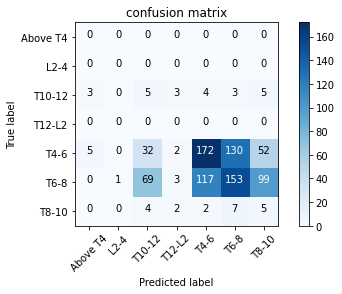

In [14]:
classes = ['Above T4', 'L2-4', 'T10-12', 'T12-L2', 'T4-6', 'T6-8', 'T8-10']
cm = confusion_matrix(predict, test_y)
plot_confusion_matrix(cm, classes=classes, normalize=False, title='confusion matrix')